In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from pathlib import Path
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
from tensorflow.keras.models import Model

Using TensorFlow backend.


In [2]:
f=pd.read_csv("train.csv")
images=[]

In [3]:
X_=f["ImageId"].values
y=f["NameOfPokemon"].values
pokemon_dict={"Pikachu":0,"Charmander":1,"Bulbasaur":2}
ls=[pokemon_dict[name] for name in y]
y=np_utils.to_categorical(ls,num_classes=3)
print(y.shape)

(304, 3)


In [4]:
p=Path("./Images/")

dirs=p.glob("*.jpg")
cnt=0
for d in dirs:
    img=image.load_img(d,target_size=(80,80))
    img_arr=image.img_to_array(img,dtype='uint8')
    img_arr=img_arr/255.0
    images.append(img_arr)

C:\Users\verma\anaconda3\lib\site-packages\PIL\Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [5]:
print(cnt)
X=np.array(images)
print(X.shape)

0
(304, 80, 80, 3)


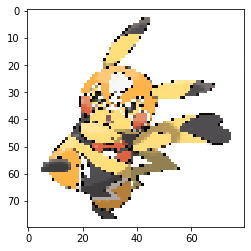

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [6]:
plt.imshow(X[22],cmap="gray")
plt.show()
X[110]

In [7]:
#Model

In [150]:
model=Sequential()
model.add(Convolution2D(100,(3,3),activation="relu",input_shape=(80,80,3)))
model.add(Convolution2D(50,(3,3),activation="relu"))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(100,(3,3),activation="relu"))
model.add(Convolution2D(50,(3,3),activation="relu"))
model.add(Dropout(0.15))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(100,(3,3),activation="relu"))
model.add(Convolution2D(50,(3,3),activation="relu"))
model.add(Dropout(0.15))
model.add(Flatten())
model.add(Dense(3,activation="softmax"))  #Units depends on the shape of Y(here it is (304,3))

In [151]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_114 (Conv2D)          (None, 78, 78, 100)       2800      
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 76, 76, 50)        45050     
_________________________________________________________________
dropout_39 (Dropout)         (None, 76, 76, 50)        0         
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 38, 38, 50)        0         
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 36, 36, 100)       45100     
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 34, 34, 50)        45050     
_________________________________________________________________
dropout_40 (Dropout)         (None, 34, 34, 50)      

In [152]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [153]:
model.fit(X,y,epochs=10,batch_size=50)

Epoch 1/10
7/7 [==============================] - 7s 1s/step - loss: 1.0780 - accuracy: 0.4211
Epoch 2/10
7/7 [==============================] - 11s 2s/step - loss: 0.6910 - accuracy: 0.7237
Epoch 3/10
7/7 [==============================] - 18s 3s/step - loss: 0.4958 - accuracy: 0.7664
Epoch 4/10
7/7 [==============================] - 19s 3s/step - loss: 0.2796 - accuracy: 0.8980
Epoch 5/10
7/7 [==============================] - 15s 2s/step - loss: 0.4229 - accuracy: 0.8487
Epoch 6/10
7/7 [==============================] - 12s 2s/step - loss: 0.3045 - accuracy: 0.8750
Epoch 7/10
7/7 [==============================] - 11s 2s/step - loss: 0.1812 - accuracy: 0.9276
Epoch 8/10
7/7 [==============================] - 11s 2s/step - loss: 0.1314 - accuracy: 0.9572
Epoch 9/10
7/7 [==============================] - 11s 2s/step - loss: 0.1060 - accuracy: 0.9671
Epoch 10/10
7/7 [==============================] - 11s 2s/step - loss: 0.1010 - accuracy: 0.9605


In [154]:
model.evaluate(X,y)

10/10 [==============================] - 2s 216ms/step - loss: 0.1008 - accuracy: 0.9704


[0.10082227736711502, 0.9703947305679321]

In [155]:
test=pd.read_csv("./test.csv")

In [156]:
X__=test['ImageId'].values

In [157]:
images_data = []
for img in X__:
    image = cv2.imread("Images_test/"+img)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image  = cv2.resize(image,(80,80))
    image=image/255.0
    images_data.append(image)

In [158]:
X_test=np.array(images_data)
print(X_test.shape)

(123, 80, 80, 3)


In [159]:
test=model.predict_classes(X_test)

In [160]:
test

array([2, 1, 2, 1, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 1, 0, 1, 1, 0, 1, 0, 2,
       1, 2, 0, 1, 2, 2, 0, 0, 0, 0, 1, 2, 0, 2, 2, 2, 1, 2, 2, 1, 0, 0,
       1, 2, 1, 2, 0, 1, 0, 1, 0, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0,
       2, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 2, 1,
       1, 2, 2, 1, 2, 0, 0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 1, 0, 0, 0, 1, 2,
       0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 1, 2, 0], dtype=int64)

In [161]:
rev_dict={0:"Pikachu",1:"Charmander",2:"Bulbasaur"}

In [162]:
lst=[rev_dict[num] for num in test]

In [163]:
df=pd.DataFrame(list(zip(X__,lst)),columns=["ImageId","NameOfPokemon"])

In [164]:
df.to_csv("submission2.csv",index=False)